In [39]:
# pick 4 training sets, gt = 5, p = 2,4,6,8
# visualize them
# see what img_ids they use, and if I can pick a validation set at the edges
# build a validation set
# see if perf increases


# job_dir = '/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/15-10-2021/15:24:56'
# job_dir = '/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/20-10-2021/23:04:37'
job_dir = '/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/28-10-2021/06:15:37'


In [45]:
import os 
import cv2
import json
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer

def visualize_coco(coco_file_name, img_dir):
    DatasetCatalog.clear()
    MetadataCatalog.clear()

    register_coco_instances('foobar', {}, coco_file_name, os.path.join(img_dir, 'rgb'))
    MetadataCatalog.get('foobar')
    dataset_dicts = DatasetCatalog.get('foobar')
    
    print(coco_file_name, len(dataset_dicts))
    fig, axs = plt.subplots(int(len(dataset_dicts)/4), 4, figsize=(20, int(len(dataset_dicts))))
    ctr = 0
    for x in range(int(len(dataset_dicts)/4)):
        for y in range(4):
            d = dataset_dicts[ctr]
            ctr += 1
            img = cv2.imread(d["file_name"])
            visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get('foobar'), scale=0.5)
            vis = visualizer.draw_dataset_dict(d)
            img = vis.get_image()
            axs[x, y].set_axis_off()
            axs[x, y].imshow(img)
            axs[x, y].set_title(d['file_name'].split('/')[-1])
    plt.show()

def get_validation_set(ids):
    val = []
    for x in ids:
        val.append([x-9, x-10, x-11, x-12, x+9, x+10, x+11, x+12])
    val = [item for sublist in val for item in sublist]

#     print(len(val), val)
    return val
        
    
def vis4(gt):
    for traj in range(1, 3):
#     for p in range(2,10,2):
        p = 8
        f = os.path.join(job_dir, str(traj), 'default', f'pred_label_gt{gt}p{p}')
        print(f)
        train_ids = os.path.join(f, 'train_img_id.json')
        if os.path.isfile(train_ids):
            with open(train_ids, "r") as x:
                data = json.load(x)
                print(data)
            val = get_validation_set(data['img_id'])
            # make a val set with this
        coco = os.path.join(f, 'coco_train.json')
        if os.path.isfile(coco):
            print(coco)
            img_dir = f'/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/{traj}/default'
            visualize_coco(coco, img_dir)

/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/28-10-2021/06:15:37/1/default/pred_label_gt5p8
{'img_id': [355, 606, 894, 1212, 1485], 'propagation_step': 8}
/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/28-10-2021/06:15:37/1/default/pred_label_gt5p8/coco_train.json
466 466
/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/28-10-2021/06:15:37/1/default/pred_label_gt5p8/coco_train.json 85


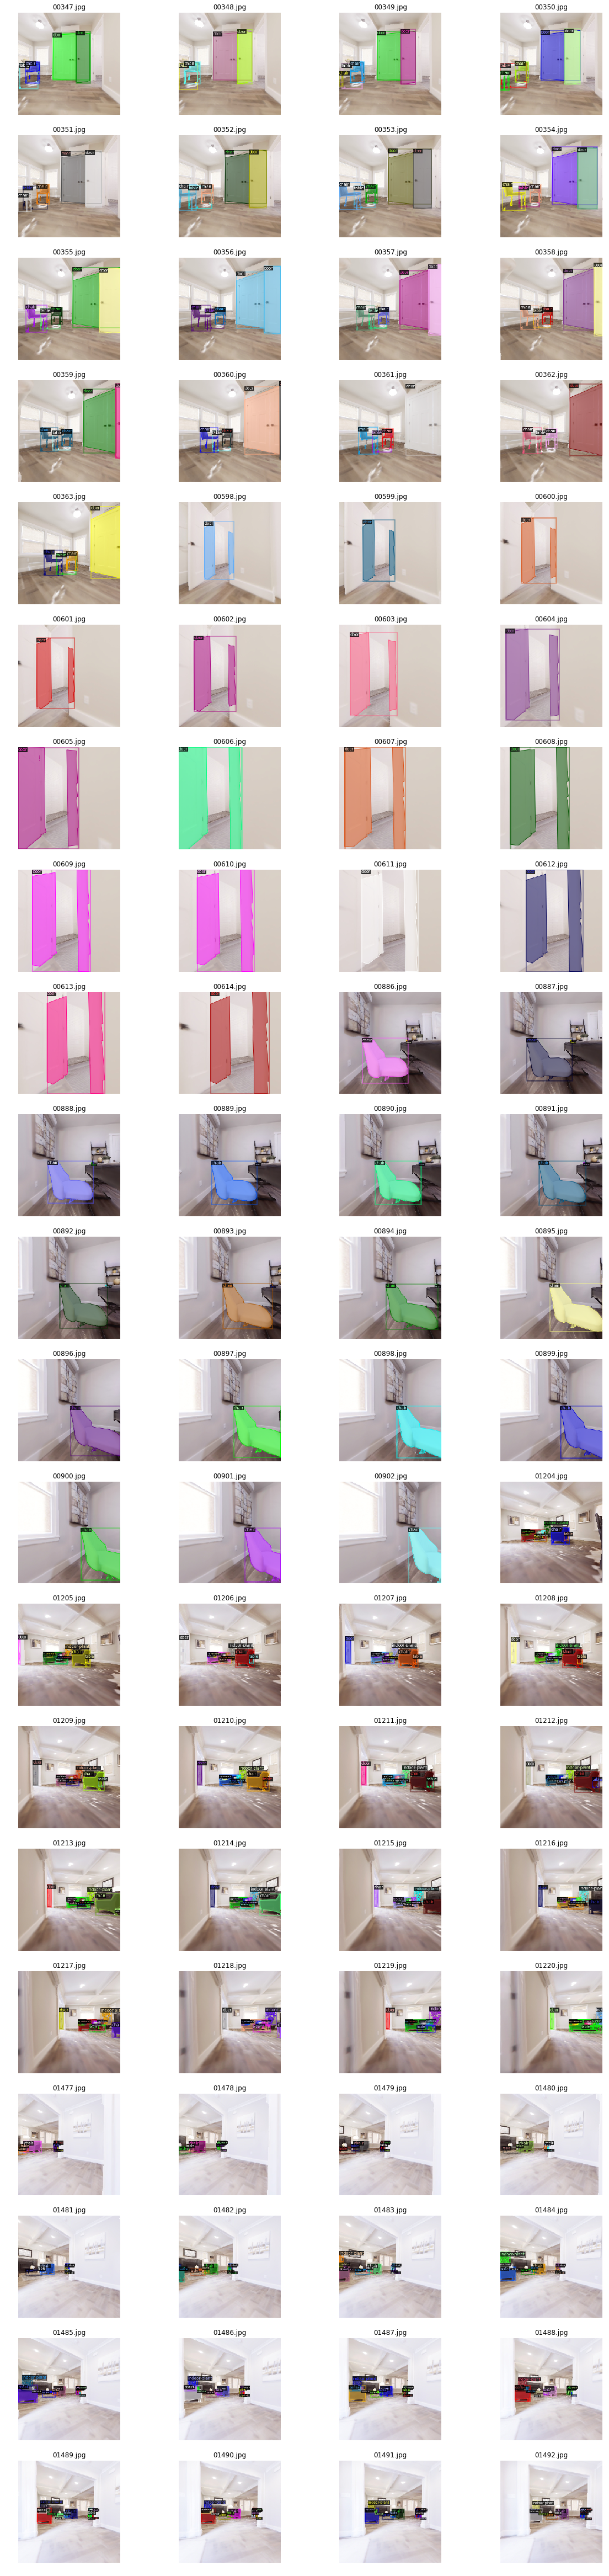

/checkpoint/apratik/jobs/active_vision/pipeline/apartment_0/straightline/no_noise/28-10-2021/06:15:37/2/default/pred_label_gt5p8


In [46]:
vis4(gt=5)

40 40
/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/1/default/seg/coco_gt5_val.json 9


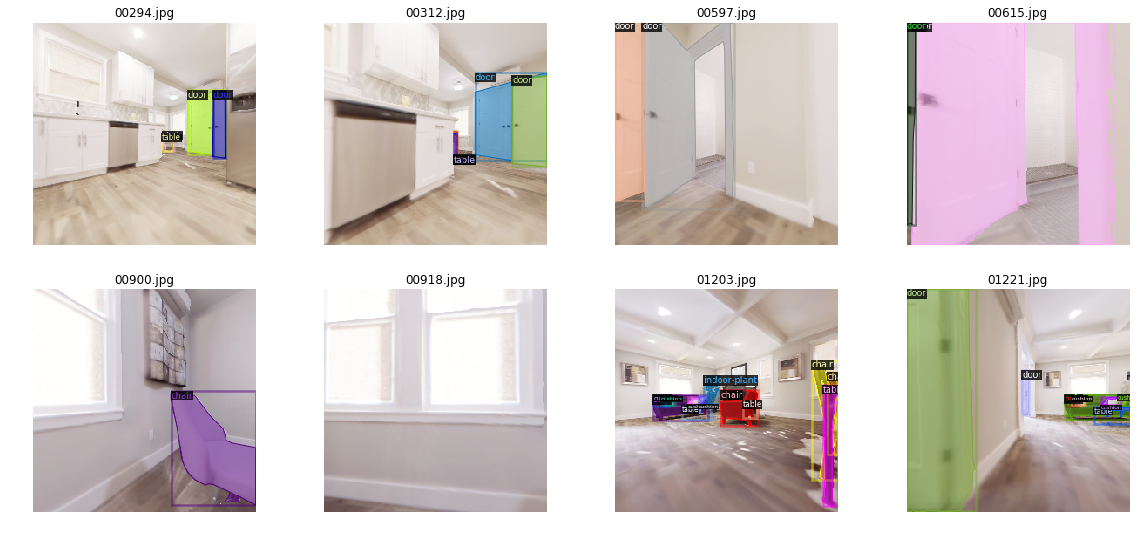

In [29]:
val_json = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/1/default/seg/coco_gt5_val.json'
# img_dir_val = '/checkpoint/apratik/data/data/apartment_0/default/no_noise/mul_traj_200/83/rgb'
img_dir_val = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/1/default'
visualize_coco(val_json, img_dir_val)